Predicting the Severity of a Car Accident

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!wget -O Collisions.csv http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D

--2020-10-10 02:29:00--  http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D
Resolving data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)... 52.22.243.25, 35.169.194.0, 52.5.48.189, ...
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|52.22.243.25|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D [following]
--2020-10-10 02:29:01--  https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|52.22.243.25|:443... connected.
HTTP request sen

In [2]:
df = pd.read_csv('Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Feature selection
severity_df = df[['ADDRTYPE', 'SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]
severity_df.head()

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Block,2,2,1,Driveway Junction,Clear,Dry,Daylight,NaN
1,Block,2,7,1,Mid-Block (not related to intersection),Overcast,Dry,Dark - Street Lights On,NaN
2,Intersection,1,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
3,Intersection,1,2,0,At Intersection (intersection related),NaN,NaN,NaN,NaN
4,Block,0,1,0,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN


In [4]:
# Data cleaning
severity_df["ROADCOND"].replace(np.nan, "Unknown", inplace=True)
severity_df["LIGHTCOND"].replace(np.nan, "Unknown", inplace=True)
severity_df["JUNCTIONTYPE"].replace(np.nan, "Unknown", inplace=True)
severity_df["WEATHER"].replace(np.nan, "Unknown", inplace=True)
severity_df["ADDRTYPE"].replace(np.nan, "Unknown", inplace=True)
severity_df["SPEEDING"].replace(np.nan, "N", inplace=True)
severity_df["SEVERITYCODE"].replace(np.nan, "0", inplace=True)

severity_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Block,2,2,1,Driveway Junction,Clear,Dry,Daylight,N
1,Block,2,7,1,Mid-Block (not related to intersection),Overcast,Dry,Dark - Street Lights On,N
2,Intersection,1,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,N
3,Intersection,1,2,0,At Intersection (intersection related),Unknown,Unknown,Unknown,N
4,Block,0,1,0,Mid-Block (not related to intersection),Unknown,Unknown,Unknown,N


In [5]:
X = severity_df[['ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']].values
y = severity_df["SEVERITYCODE"]

In [6]:
# Data transforming
le_addr = preprocessing.LabelEncoder()
le_addr.fit(['Alley','Block','Intersection','Unknown'])
X[:,0] = le_addr.transform(X[:,0])

le_jun = preprocessing.LabelEncoder()
le_jun.fit(['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'])
X[:,3] = le_jun.transform(X[:,3])

le_wea = preprocessing.LabelEncoder()
le_wea.fit(['Blowing Sand/Dirt','Blowing Snow','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'])
X[:,4] = le_wea.transform(X[:,4])

le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'])
X[:,5] = le_road.transform(X[:,5])

le_light = preprocessing.LabelEncoder()
le_light.fit(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'])
X[:,6] = le_light.transform(X[:,6])

le_spd = preprocessing.LabelEncoder()
le_spd.fit(['N','Y'])
X[:,7] = le_spd.transform(X[:,7])

le_svry = preprocessing.LabelEncoder()
le_svry.fit(['0','1','2','2b','3'])
y[:] = le_svry.transform(y[:])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:1043: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [21]:
# K Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = jaccard_similarity_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    print("KNN's Accuracy: ", jaccard_similarity_score(y_test, yhat), "F1-score: ", f1_score(y_test, yhat, average='weighted'))

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

KNN's Accuracy:  0.6727683105744273 F1-score:  0.6682063649172947


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7288567881728925 F1-score:  0.6798791825255096


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7068953842681412 F1-score:  0.689519379789252


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7341835007335515 F1-score:  0.7004398891530415


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7241169168265433 F1-score:  0.7021419641529444


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7347252003159914 F1-score:  0.6991880525810555


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7289696422525674 F1-score:  0.7039286801853173


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN's Accuracy:  0.7378399729150209 F1-score:  0.7006871194656413
KNN's Accuracy:  0.7353797539781063 F1-score:  0.706300442050718
The best accuracy was with 0.7378399729150209 with k= 8


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


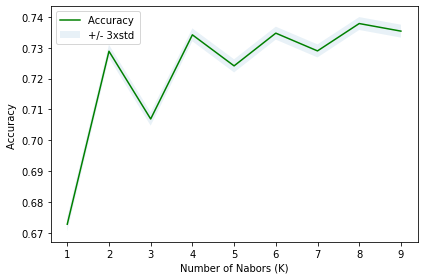

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(3,Ks):
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    loanTree.fit(X_train,y_train)
    predTree = loanTree.predict(X_test)
    mean_acc[n-1] = jaccard_similarity_score(y_test, predTree)
    std_acc[n-1] = np.std(predTree==y_test)/np.sqrt(predTree.shape[0])
    
    print("DecisionTrees's Accuracy: ", jaccard_similarity_score(y_test, predTree), "F1-score: ", f1_score(y_test, predTree, average='weighted'))
    
print( "The best accuracy was with", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTrees's Accuracy:  0.7448594966708046 F1-score:  0.686019787674201


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTrees's Accuracy:  0.7465974494977994 F1-score:  0.6902274829008302


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTrees's Accuracy:  0.7495767972012188 F1-score:  0.702140332482538


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTrees's Accuracy:  0.7537749689651281 F1-score:  0.7070303626408581


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTrees's Accuracy:  0.7536621148854531 F1-score:  0.7070757458405765


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTrees's Accuracy:  0.754113531204153 F1-score:  0.7081262252097417
DecisionTrees's Accuracy:  0.754632659970658 F1-score:  0.7065925067484587
DecisionTrees's Accuracy:  0.754564947522853 F1-score:  0.7072415249092413
DecisionTrees's Accuracy:  0.754745514050333 F1-score:  0.7108265052971425
DecisionTrees's Accuracy:  0.754045818756348 F1-score:  0.7104294437806338
DecisionTrees's Accuracy:  0.7531429861189483 F1-score:  0.7094328740261903
DecisionTrees's Accuracy:  0.7533461234623632 F1-score:  0.7108910351040365
DecisionTrees's Accuracy:  0.7517210247150434 F1-score:  0.7076905496236197
DecisionTrees's Accuracy:  0.7513824624760185 F1-score:  0.7089398789895471
DecisionTrees's Accuracy:  0.7509987586051236 F1-score:  0.7088407547707355
DecisionTrees's Accuracy:  0.7504119173908137 F1-score:  0.7081380725047509
DecisionTrees's Accuracy:  0.7503216341270736 F1-score:  0.7073037514408925
The best accuracy was with 0.754745514050333 with max_depth= 11


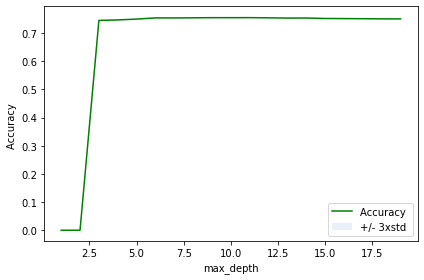

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('max_depth')
plt.tight_layout()
plt.show()

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

Ks = 5
function = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    LR = LogisticRegression(C=0.01, solver=function[n-1]).fit(X_train,y_train)
    yhat3 = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    mean_acc[n-1] = log_loss(y_test, yhat_prob)
    
    print("Logistic Regression's Accuracy: ", jaccard_similarity_score(y_test, yhat3), "F1-score: ", f1_score(y_test, yhat3, average='weighted'), "LogLoss: ", log_loss(y_test, yhat_prob))

print( "The least log loss was with", mean_acc.min(), "with solver=", function[mean_acc.argmin()]) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression's Accuracy:  0.7234172215325584 F1-score:  0.6680697280129126 LogLoss:  0.627257733797088


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression's Accuracy:  0.7234172215325584 F1-score:  0.6680697280129126 LogLoss:  0.627258885610285


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression's Accuracy:  0.7237783545875184 F1-score:  0.6678637300144797 LogLoss:  0.6286851738277852


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression's Accuracy:  0.7234172215325584 F1-score:  0.6680680007815754 LogLoss:  0.6277354595682997


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression's Accuracy:  0.7234172215325584 F1-score:  0.668041944764493 LogLoss:  0.628041719688412
The least log loss was with 0.627257733797088 with solver= newton-cg


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
